<a href="https://colab.research.google.com/github/kusheshgangwar/FEATURE-ENGINEERING/blob/main/FEATURE_ENGINEERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sample dataset with timestamps and sensor readings
import numpy as np
import pandas as pd

data = {
    'Timestamp': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Temperature': [60, 62, 65, 67, 70, 74, 76, 78, 80, 85],
    'Vibration': [0.5, 0.7, 0.6, 0.8, 0.9, 1.2, 1.5, 1.8, 2.0, 2.5],
    'Failure': [0, 0, 0, 0, 1, 0, 0, 1, 0, 1]  # Equipment failure indicator
}

df = pd.DataFrame(data)

In [ ]:
# *1. Time-Based Features*
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek  # Day of the week (0=Monday)
df['Hour_of_Day'] = df['Timestamp'].dt.hour  # Extract hour (useful for hourly data)
df['Month'] = df['Timestamp'].dt.month  # Extract month

In [ ]:
# *2. Rolling Statistics (Useful for detecting anomalies)*
df['Temp_Mean_3D'] = df['Temperature'].rolling(window=3, min_periods=1).mean()
df['Temp_Std_3D'] = df['Temperature'].rolling(window=3, min_periods=1).std()
df['Vib_Mean_3D'] = df['Vibration'].rolling(window=3, min_periods=1).mean()
df['Vib_Std_3D'] = df['Vibration'].rolling(window=3, min_periods=1).std()


In [ ]:
# *3. Lag Features (Previous values to detect trends)*
df['Temp_Lag_1D'] = df['Temperature'].shift(1)
df['Vib_Lag_1D'] = df['Vibration'].shift(1)

In [ ]:
# *4. Interaction Features (Multiplying correlated features)*
df['Temp_Vib_Interaction'] = df['Temperature'] * df['Vibration']


In [ ]:
# *5. Binary Flags (Detecting high-risk conditions)*
df['High_Temp'] = (df['Temperature'] > 75).astype(int)  # Flag when temperature > 75
df['High_Vib'] = (df['Vibration'] > 1.5).astype(int)  # Flag when vibration > 1.5


In [ ]:
# *Check Processed Data*
print(df.head())

   Timestamp  Temperature  Vibration  Failure  Day_of_Week  Hour_of_Day  \
0 2024-01-01           60        0.5        0            0            0   
1 2024-01-02           62        0.7        0            1            0   
2 2024-01-03           65        0.6        0            2            0   
3 2024-01-04           67        0.8        0            3            0   
4 2024-01-05           70        0.9        1            4            0   

   Month  Temp_Mean_3D  Temp_Std_3D  Vib_Mean_3D  Vib_Std_3D  Temp_Lag_1D  \
0      1     60.000000          NaN     0.500000         NaN          NaN   
1      1     61.000000     1.414214     0.600000    0.141421         60.0   
2      1     62.333333     2.516611     0.600000    0.100000         62.0   
3      1     64.666667     2.516611     0.700000    0.100000         65.0   
4      1     67.333333     2.516611     0.766667    0.152753         67.0   

   Vib_Lag_1D  Temp_Vib_Interaction  High_Temp  High_Vib  
0         NaN              

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state

In [ ]:
# *2. Train your Decision Tree model*
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)  # Adjust parameters as needed
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# *3. Make predictions*
y_pred = regressor.predict(X_test)

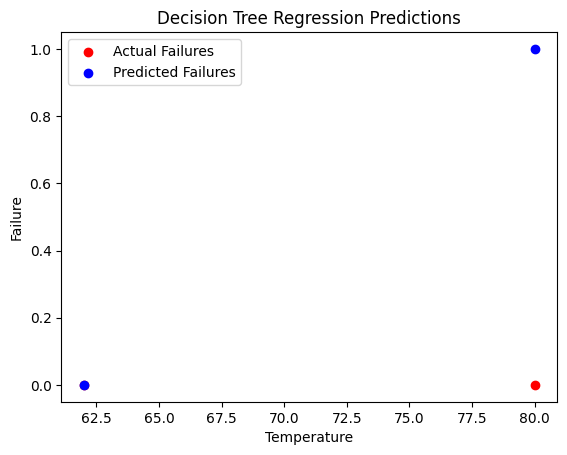

In [ ]:
# *4. Plotting Predictions (replace "Size (sqft)" with an actual feature column in the x-axis)*
import matplotlib.pyplot as plt

plt.scatter(X_test['Temperature'], y_test, color="red", label="Actual Failures")  # Replace "Temperature" if not needed for visualization
plt.scatter(X_test['Temperature'], y_pred, color="blue", label="Predicted Failures") # Replace "Temperature" if not needed for visualization
plt.xlabel("Temperature") # Replace with your visualization column
plt.ylabel("Failure")
plt.legend()
plt.title("Decision Tree Regression Predictions")
plt.show()